In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pwd

/content


In [4]:
%cd '/content/drive/My Drive/'

/content/drive/My Drive


In [4]:
#!git clone https://github.com/anajovanoviic/mitohondrije.git

fatal: destination path 'mitohondrije' already exists and is not an empty directory.


In [ ]:
!pwd

/content/drive/MyDrive/mitohondrije


In [5]:
%cd mitohondrije/

/content/drive/My Drive/mitohondrije


In [6]:
!pwd

/content/drive/My Drive/mitohondrije


In [6]:
from simple_unet_model import simple_unet_model   #Use normal unet model
from keras.utils import normalize
import os
import cv2
from PIL import Image #pillow library makes it easy to resize images
import numpy as np
from matplotlib import pyplot as plt


In [7]:
image_directory = 'patches/images/'
mask_directory = 'patches/masks/'

In [8]:
SIZE = 256
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

In [9]:
images = os.listdir(image_directory)
images.sort()

In [10]:
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'tif'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 0)
        image = Image.fromarray(image) #converting to pillow object in order to resize
        image = image.resize((SIZE, SIZE)) #resize
        image_dataset.append(np.array(image)) #convert back one image to numpy array an append to image dataset

In [11]:
masks = os.listdir(mask_directory)
masks.sort()
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'tif'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))

In [12]:
#Normalize images - always normalize/scale inputs when you are doing deep learning
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3) #here we are converting all dataset to numpy array and normalizing 
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [13]:
image_dataset.shape

(1980, 256, 256, 1)

In [39]:
#just used to check values of pixels -  may be more efficient to use vectorized operations optimized for multi-dimensional arrays, such as np.nditer.
for i in range(mask_dataset.shape[0]):
    for j in range(mask_dataset.shape[1]):
        for k in range(mask_dataset.shape[2]):
            for l in range(mask_dataset.shape[3]):
                print(f"Pixel ({i}, {j}, {k}, {l}): {mask_dataset[i, j, k, l]}")

Pixel (0, 0, 0, 0): 0.0
Pixel (0, 0, 1, 0): 0.0
Pixel (0, 0, 2, 0): 0.0
Pixel (0, 0, 3, 0): 0.0
Pixel (0, 0, 4, 0): 0.0
Pixel (0, 0, 5, 0): 0.0
Pixel (0, 0, 6, 0): 0.0
Pixel (0, 0, 7, 0): 0.0
Pixel (0, 0, 8, 0): 0.0
Pixel (0, 0, 9, 0): 0.0
Pixel (0, 0, 10, 0): 0.0
Pixel (0, 0, 11, 0): 0.0
Pixel (0, 0, 12, 0): 0.0
Pixel (0, 0, 13, 0): 0.0
Pixel (0, 0, 14, 0): 0.0
Pixel (0, 0, 15, 0): 0.0
Pixel (0, 0, 16, 0): 0.0
Pixel (0, 0, 17, 0): 0.0
Pixel (0, 0, 18, 0): 0.0
Pixel (0, 0, 19, 0): 0.0
Pixel (0, 0, 20, 0): 0.0
Pixel (0, 0, 21, 0): 0.0
Pixel (0, 0, 22, 0): 0.0
Pixel (0, 0, 23, 0): 0.0
Pixel (0, 0, 24, 0): 0.0
Pixel (0, 0, 25, 0): 0.0
Pixel (0, 0, 26, 0): 0.0
Pixel (0, 0, 27, 0): 0.0
Pixel (0, 0, 28, 0): 0.0
Pixel (0, 0, 29, 0): 0.0
Pixel (0, 0, 30, 0): 0.0
Pixel (0, 0, 31, 0): 0.0
Pixel (0, 0, 32, 0): 0.0
Pixel (0, 0, 33, 0): 0.0
Pixel (0, 0, 34, 0): 0.0
Pixel (0, 0, 35, 0): 0.0
Pixel (0, 0, 36, 0): 0.0
Pixel (0, 0, 37, 0): 0.0
Pixel (0, 0, 38, 0): 0.0
Pixel (0, 0, 39, 0): 0.0
Pixel (0, 

KeyboardInterrupt: ignored

In [ ]:
for x in np.nditer(mask_dataset):
  print(x)

In [14]:
# 10%1980 = 198
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

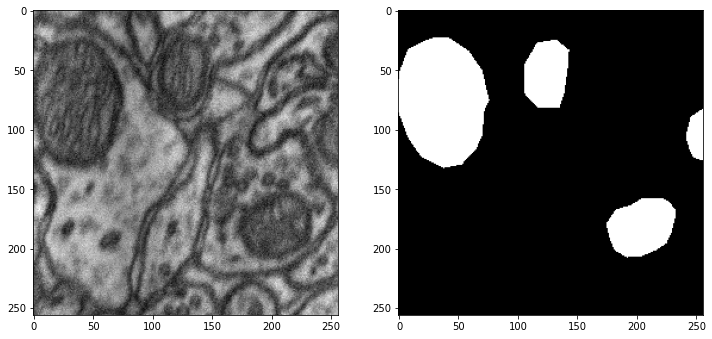

In [15]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
ono_sto_plotujem = np.reshape(X_train[image_number], (256, 256))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [16]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]  

In [17]:
def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [18]:
model = get_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

In [57]:
model.save('mitochondria_test.hdf5')
# inject code for loading saved

In [21]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

7/7 [==============================] - 4s 171ms/step - loss: 0.0102 - accuracy: 0.9961
Accuracy =  99.60876703262329 %


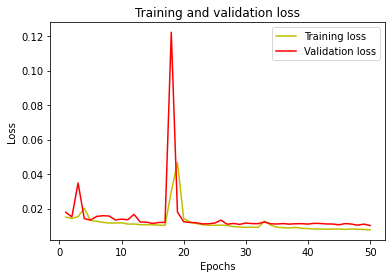

In [59]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

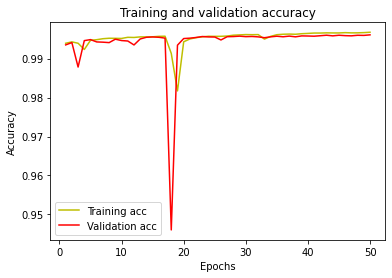

In [60]:
#acc = history.history['acc']
acc = history.history['accuracy']
#val_acc = history.history['val_acc']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
y_pred=model.predict(X_test)
# cause activation in simple_unet_model is sigmoid, prediction is probability 
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

7/7 [==============================] - 1s 74ms/step
IoU socre is:  0.9306767642146976


In [69]:
# cudno je sto vrednost ove promenljive nije true ni jednom jer sreeni na 20:00 kaze it's true whenever there is a mitochondria pixel?
for x in np.nditer(y_pred_thresholded):
  if x == "True":
    print(x)

In [20]:
# if you are starting without training
#Predict on a few images
model = get_model()
model.load_weights('mitochondria_test.hdf5') #Trained for 50 epochs and then additional 100

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 256, 256, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

In [98]:
len(X_test)

198

1/1 [==============================] - 0s 25ms/step


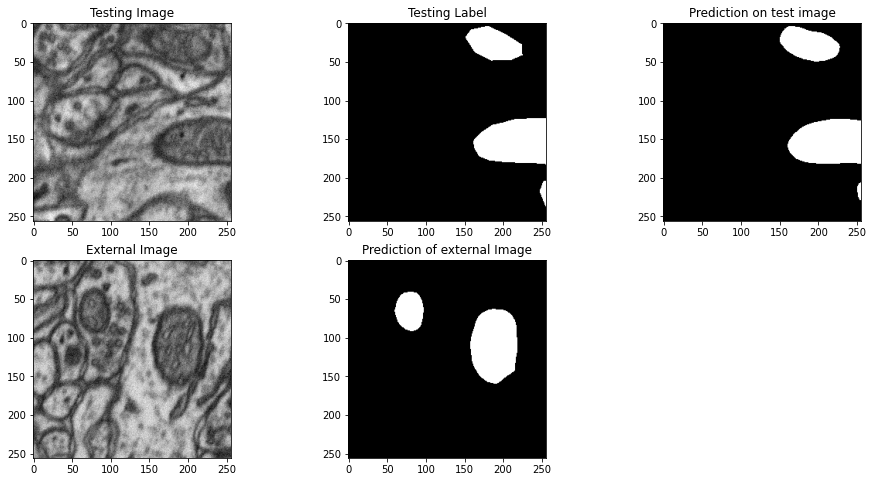

In [24]:
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)




test_img_other = cv2.imread('patches/test_images/timage_151_23.tif', 0)
#test_img_other = cv2.imread('patches/test_images/02-1_256.tif', 0)
#test_img_other = cv2.imread('data/test_images/img8.tif', 0)
test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
test_img_other_input=np.expand_dims(test_img_other_norm, 0)

#Predict and threshold for values above 0.5 probability
#Change the probability threshold to low value (e.g. 0.05) for watershed demo.
prediction_other = (model.predict(test_img_other_input)[0,:,:,0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('External Image')
plt.imshow(test_img_other, cmap='gray')
plt.subplot(235)
plt.title('Prediction of external Image')
plt.imshow(prediction_other, cmap='gray')
plt.show()
